Created: 10/03/21 12:14pm 

Author: __Phillip Luong__

Last Updated: 15/03/21 10:17am

In [36]:
import atomica as at
import numpy as np
import matplotlib.pyplot as plt
import sciris as sc

## Generate a Framework and Databook

In [10]:
F = at.ProjectFramework('syphilis_framework_v1.xlsx')
D = at.ProjectData.new(framework=F, tvec=list(range(2010,2021)),pops=1,transfers=0)
D.add_pop('neg','HIV negative')
D.add_pop('pos','HIV positive')
D.add_transfer('hiv','HIV transmission')
D.add_transfer('hivp', 'HIV transmission (with PrEP)')
# D.save('syphilis_databook_v2.xlsx') ### IF YOU WANT TO RUN THIS AGAIN, CHANGE THE NAME OF THE FILE

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

Object saved to C:\Users\iamph\Google Drive (phillip.luong@burnet.edu.au)\Coding Projects\2021-03 Syphilis Modelling Atomica\syphilis_databook_v1.xlsx.


## Check if this works with only one population

In [4]:
F = at.ProjectFramework('syphilis_framework_v02.xlsx')
D = at.ProjectData.new(framework=F, tvec=list(range(2010,2021)), pops=1, transfers=0)
D.save('syphilis_databook_v02.xlsx')

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

InvalidFramework: Parameter "b_rate" has an outflow from a source compartment, so it needs to be in "number" units

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

Elapsed time for running "default": 0.0119s


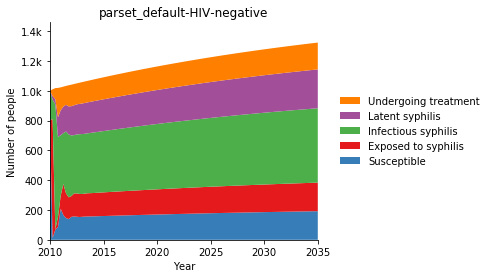

In [19]:
F = at.ProjectFramework('syphilis_framework_v02.xlsx')
D = at.ProjectData.from_spreadsheet('syphilis_databook_v02.xlsx', framework=F)
P = at.Project(framework=F, databook= D)
d = at.PlotData(P.results[0], project= P)
at.plot_series(d, plot_type='stacked');

## Add the HIV+ population (and fix up the interactions section)

In [20]:
D = at.ProjectData.from_spreadsheet('syphilis_databook_v02.xlsx',framework=F)
D.add_pop('pos','HIV positive')
D.add_transfer('hiv_inf','HIV infection')
D.save('syphilis_databook_v03.xlsx')

Object saved to C:\Users\iamph\Google Drive (phillip.luong@burnet.edu.au)\Coding Projects\2021-03 Syphilis Modelling Atomica\syphilis_databook_v03.xlsx.


Elapsed time for running "default": 0.0303s


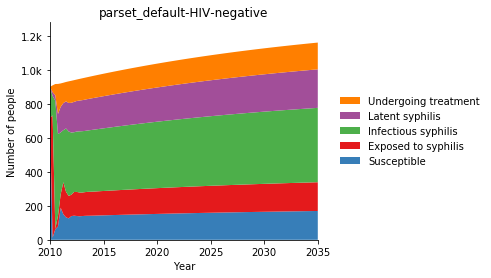

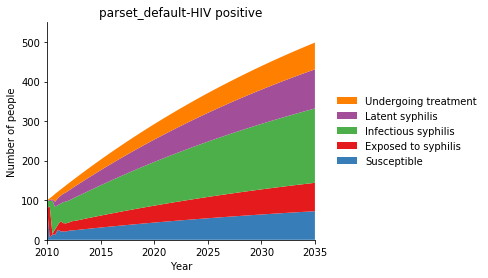

In [23]:
P = at.Project(framework=F, databook= 'syphilis_databook_v03.xlsx')
d = at.PlotData(P.results[0],project=P)
at.plot_series(d,plot_type='stacked');

### We also aim to plot the flow from HIV-negative to HIV-positive
The `outputs` argument in the command below follows a standard syntax for accessing flow rates in Atomica. (`source_name:dest_name:par_name`) - for more details, see the code documentation.

In [25]:
d = at.PlotData(P.results[0], outputs=['sus::expo_neg_to_pos','expo::inf_neg_to_pos','inf::lat_neg_to_pos'],pops='neg',project=P)

IndexError: list index out of range

#### Clearly I need to check this out (above)

In [31]:
D = at.ProjectData.from_spreadsheet('syphilis_databook_v03.xlsx',framework=F)
D.add_interaction('serodis', 'erodiscordant sex')
D.save('syphilis_databook_v03_2.xlsx')

Object saved to C:\Users\iamph\Google Drive (phillip.luong@burnet.edu.au)\Coding Projects\2021-03 Syphilis Modelling Atomica\syphilis_databook_v03_2.xlsx.


C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

Elapsed time for running "default": 0.0249s


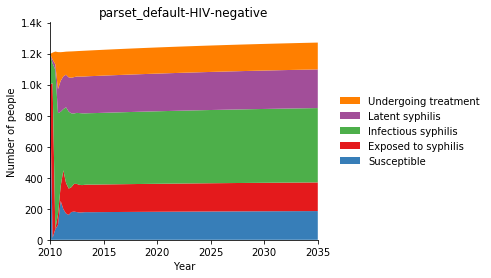

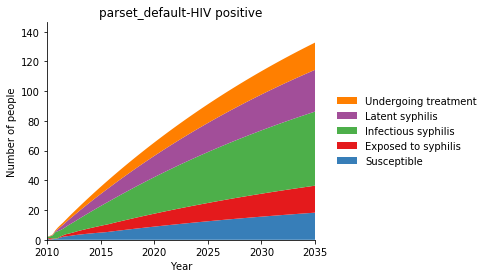

In [41]:
F = at.ProjectFramework('syphilis_framework_v03.xlsx')
P = at.Project(framework=F, databook= 'syphilis_databook_v03_2.xlsx')
d = at.PlotData(P.results[0],project=P)
at.plot_series(d,plot_type='stacked');

## Changing some parameters to make sure this works:

In [48]:
s_parset = sc.dcp(P.parsets[0])
s_parset.pars['hiv_inf']

Exception: KeyError('hiv_inf',)
odict key "hiv_inf" not found; available keys are:
sus
inf
b_rate
prog_inf
prog_lat
trt_rate
doth_rate
m_rate
infx
trt_sus
cndm
cndm_eff
foi_in
foi_out

Elapsed time for running "default": 0.0339s


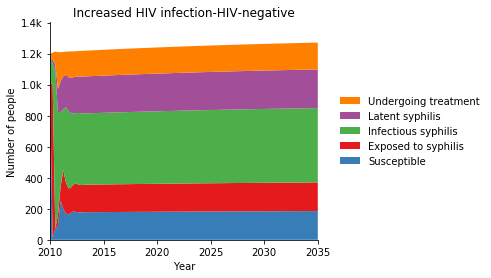

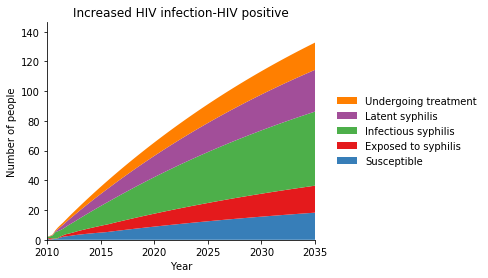

In [42]:
s_parset = sc.dcp(P.parsets[0])
s_parset.pars['hiv_inf'] = 0.5
res_manual = P.run_sim(s_parset, result_name='Increased HIV infection')
d = at.PlotData(res_manual,project=P)
at.plot_series(d,plot_type='stacked');

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

Elapsed time for running "default": 0.0249s


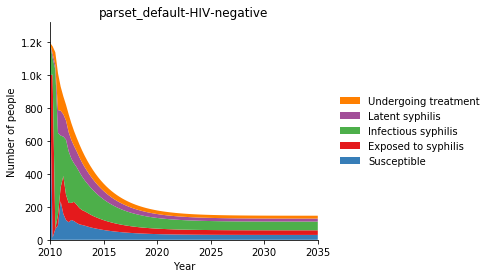

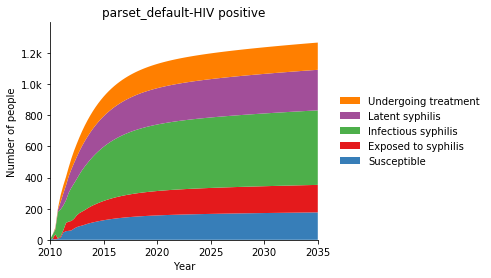

In [46]:
## This is me manually changing the infection rate to 0.5
F = at.ProjectFramework('syphilis_framework_v03.xlsx')
P = at.Project(framework=F, databook= 'syphilis_databook_v03_2.xlsx')
d = at.PlotData(P.results[0],project=P)
at.plot_series(d,plot_type='stacked');